<a href="https://colab.research.google.com/github/chandrashekarswamy/EVA-Phase-01/blob/master/Assignment%2003/EVA_Assignment%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
#importing all the necessary libraries 
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

#mnist is the data base (contains labled dataset)
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#Loading the training and test sets to X_train, y_train and X_test and y_test
#Respectively from mnist data base
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


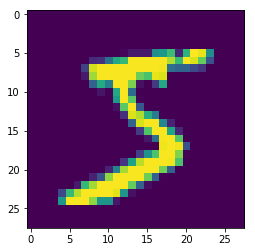

In [0]:
#Print the training data using matplot library,
#matplotlib inline is needed when we run using browser
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

#See the share of first image
plt.imshow(X_train[0])

In [0]:
#Kears need (n, width, hight, depth) mnist have only (n, w, h) in mnist
#we know its a Grey scale so we keep depth as 1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#convert our data type to float32 
#Normalize values to the range [0, 1].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
#Print 10 values of training dataset
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#print the training data set after converting 1-D array to 10-D array
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
#Declare the sequential keras model
model = Sequential()

#we are adding the first convolution layer with input of (w,h,d)
#32 = numer of convolutions(kernels), 3,3 is row col of kernels so its 3*3
#Activation = 'relu' this will be used to normalise the values between 0-1
#Receptive field of this layer = 3*3 input channel = 28*28*1
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(12, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3))

#result should be converted back to 1-D array, to show as 0-9
model.add(Flatten())
model.add(Activation('softmax'))

#will give the summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_557 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_558 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_559 (Conv2D)          (None, 22, 22, 16)        2320      
_________________________________________________________________
conv2d_560 (Conv2D)          (None, 20, 20, 16)        2320      
_________________________________________________________________
conv2d_561 (Conv2D)          (None, 18, 18, 32)        4640      
_________________________________________________________________
conv2d_562 (Conv2D)          (None, 18, 18, 12)        396       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 9, 9, 12)          0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activatio

In [0]:
# this is to compile the model 
#NOTE: we can use different loss function and optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
#Here we diclared batch size of 16 so 10000/16 batches + declared 20 epoch
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Epoch 1/20
  608/60000 [..............................] - ETA: 18s - loss: 0.0200 - acc: 0.9934

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 15s 255us/step - loss: 0.0279 - acc: 0.9913
Epoch 2/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.0264 - acc: 0.9918
Epoch 3/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.0253 - acc: 0.9920
Epoch 4/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0230 - acc: 0.9927
Epoch 5/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.0220 - acc: 0.9934
Epoch 6/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.0206 - acc: 0.9933
Epoch 7/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.0193 - acc: 0.9936
Epoch 8/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.0177 - acc: 0.9941
Epoch 9/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.0174 - acc: 0.9943
Epoch 10/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0156 - ac

In [0]:
#evaluate the model 
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
#print the score
print(score)

[0.03609808942139071, 0.9913]


In [0]:
#Predict the number present in X_test 
y_pred = model.predict(X_test)

In [0]:
#y_pred is predected value y_test is actual test value.
print(y_pred[:9])
print(y_test[:9])

[[7.12699957e-22 4.42224520e-17 9.75975553e-14 5.08816980e-16
  2.76791715e-11 9.77850349e-21 2.68337354e-32 1.00000000e+00
  4.70339611e-18 6.71868499e-14]
 [2.13213453e-12 4.13320723e-12 1.00000000e+00 2.91300493e-19
  2.73495114e-14 6.97335332e-16 1.56209282e-10 1.61341199e-12
  1.20763574e-13 1.66170437e-21]
 [1.64706559e-13 9.99999404e-01 7.03914080e-11 6.06516714e-15
  4.91637252e-07 3.64016657e-08 8.71280153e-13 8.81763071e-08
  3.34323152e-10 1.63449506e-12]
 [9.99999881e-01 1.40349347e-11 3.58801738e-10 9.56612567e-11
  1.72082793e-13 3.88104704e-09 1.31046747e-07 2.81839524e-10
  7.28846757e-12 1.85479934e-08]
 [2.99921317e-16 1.20205891e-23 1.28833954e-20 5.32134391e-23
  9.99999881e-01 1.27937298e-19 8.67009690e-18 4.08059049e-16
  2.04916672e-16 1.44595461e-07]
 [1.38035186e-13 9.99999285e-01 4.03932693e-10 3.72580703e-16
  4.10927100e-07 5.44856604e-10 6.06263696e-14 3.03104429e-07
  3.39943046e-10 4.98309239e-13]
 [5.08340550e-20 1.03893626e-13 8.46532927e-14 2.12217813e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored